In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor

In [3]:
# ------------------ Load Training and Testing Datasets ------------------
# Load the training and testing datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
# ------------------ Data Exploration ------------------
# Display basic dataset information
print("Training Data Info:")
train_df.info()
print("\nTraining Data Head:\n", train_df.head())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                6894 non-null   int64  
 1   FoodGroup         6894 non-null   object 
 2   Descrip           6894 non-null   object 
 3   Energy_kcal       6894 non-null   float64
 4   Protein_g         6894 non-null   float64
 5   Fat_g             6894 non-null   float64
 6   Carb_g            6894 non-null   float64
 7   Sugar_g           6894 non-null   float64
 8   Fiber_g           6894 non-null   float64
 9   VitA_mcg          6894 non-null   float64
 10  VitB6_mg          6894 non-null   float64
 11  VitB12_mcg        6894 non-null   float64
 12  VitC_mg           6894 non-null   float64
 13  VitE_mg           6894 non-null   float64
 14  Folate_mcg        6894 non-null   float64
 15  Niacin_mg         6894 non-null   float64
 16  Riboflavin_mg     6894

In [5]:
print("\nTesting Data Info:")
print(test_df.info())
print("\nTesting Data Head:\n", test_df.head())


Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724 entries, 0 to 1723
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1724 non-null   int64  
 1   FoodGroup         1724 non-null   object 
 2   Descrip           1724 non-null   object 
 3   Energy_kcal       1724 non-null   float64
 4   Protein_g         1724 non-null   float64
 5   Fat_g             1724 non-null   float64
 6   Carb_g            1724 non-null   float64
 7   Sugar_g           1724 non-null   float64
 8   Fiber_g           1724 non-null   float64
 9   VitA_mcg          1724 non-null   float64
 10  VitB6_mg          1724 non-null   float64
 11  VitB12_mcg        1724 non-null   float64
 12  VitC_mg           1724 non-null   float64
 13  VitE_mg           1724 non-null   float64
 14  Folate_mcg        1724 non-null   float64
 15  Niacin_mg         1724 non-null   float64
 16  Riboflavin_mg     1724

In [6]:
# Check for missing values
print("\nMissing Values in Training Data:\n", train_df.isnull().sum())
print("\nMissing Values in Testing Data:\n", test_df.isnull().sum())


Missing Values in Training Data:
 ID                  0
FoodGroup           0
Descrip             0
Energy_kcal         0
Protein_g           0
Fat_g               0
Carb_g              0
Sugar_g             0
Fiber_g             0
VitA_mcg            0
VitB6_mg            0
VitB12_mcg          0
VitC_mg             0
VitE_mg             0
Folate_mcg          0
Niacin_mg           0
Riboflavin_mg       0
Thiamin_mg          0
Calcium_mg          0
Copper_mcg          0
Iron_mg             0
Magnesium_mg        0
Manganese_mg        0
Phosphorus_mg       0
Selenium_mcg        0
Zinc_mg             0
VitA_USRDA          0
VitB6_USRDA         0
VitB12_USRDA        0
VitC_USRDA          0
VitE_USRDA          0
Folate_USRDA        0
Niacin_USRDA        0
Riboflavin_USRDA    0
Thiamin_USRDA       0
Calcium_USRDA       0
Copper_USRDA        0
Magnesium_USRDA     0
Phosphorus_USRDA    0
Selenium_USRDA      0
Zinc_USRDA          0
dtype: int64

Missing Values in Testing Data:
 ID              

In [7]:
# Statistical summary
print("\nStatistical Summary of Training Data:\n", train_df.describe())


Statistical Summary of Training Data:
                  ID  Energy_kcal    Protein_g        Fat_g       Carb_g  \
count   6894.000000  6894.000000  6894.000000  6894.000000  6894.000000   
mean   15450.896722   227.002901    11.516700    10.656012    21.962522   
std     9232.247168   170.081756    10.500028    15.933822    27.327881   
min     1002.000000     0.000000     0.000000     0.000000     0.000000   
25%     8683.250000    93.000000     2.452500     1.000000     0.040000   
50%    14273.000000   190.000000     8.300000     5.220000     9.005000   
75%    20070.750000   336.000000    19.997500    13.815000    33.500000   
max    93600.000000   902.000000    88.320000   100.000000   100.000000   

           Sugar_g      Fiber_g      VitA_mcg     VitB6_mg   VitB12_mcg  ...  \
count  6894.000000  6894.000000   6894.000000  6894.000000  6894.000000  ...   
mean      6.644353     2.027169     94.095445     0.265938     1.224388  ...   
std      13.766262     4.323947    801.86491

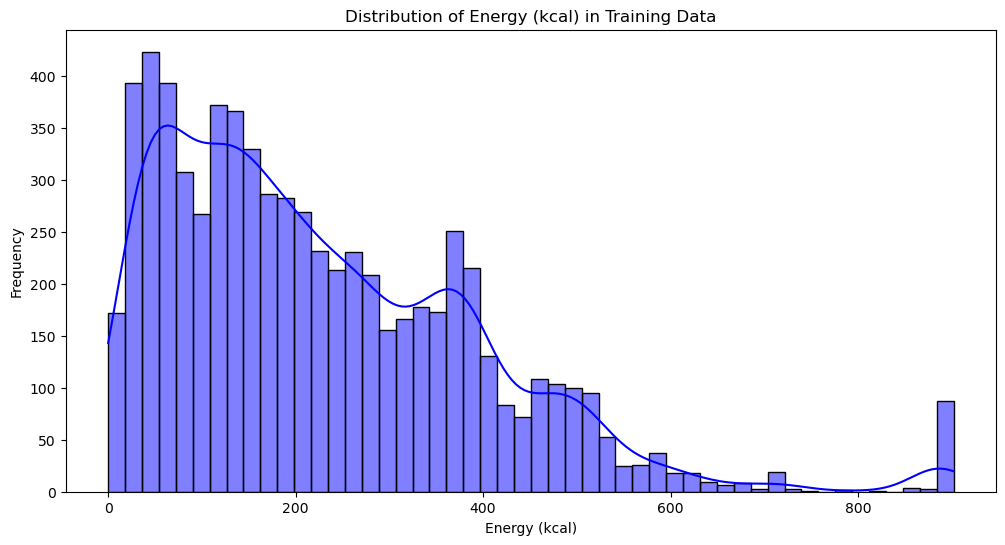

In [8]:
# ------------------ Data Visualization ------------------
# Distribution of Energy_kcal
plt.figure(figsize=(12, 6))
sns.histplot(train_df['Energy_kcal'], bins=50, kde=True, color='blue')
plt.title("Distribution of Energy (kcal) in Training Data")
plt.xlabel("Energy (kcal)")
plt.ylabel("Frequency")
plt.show()

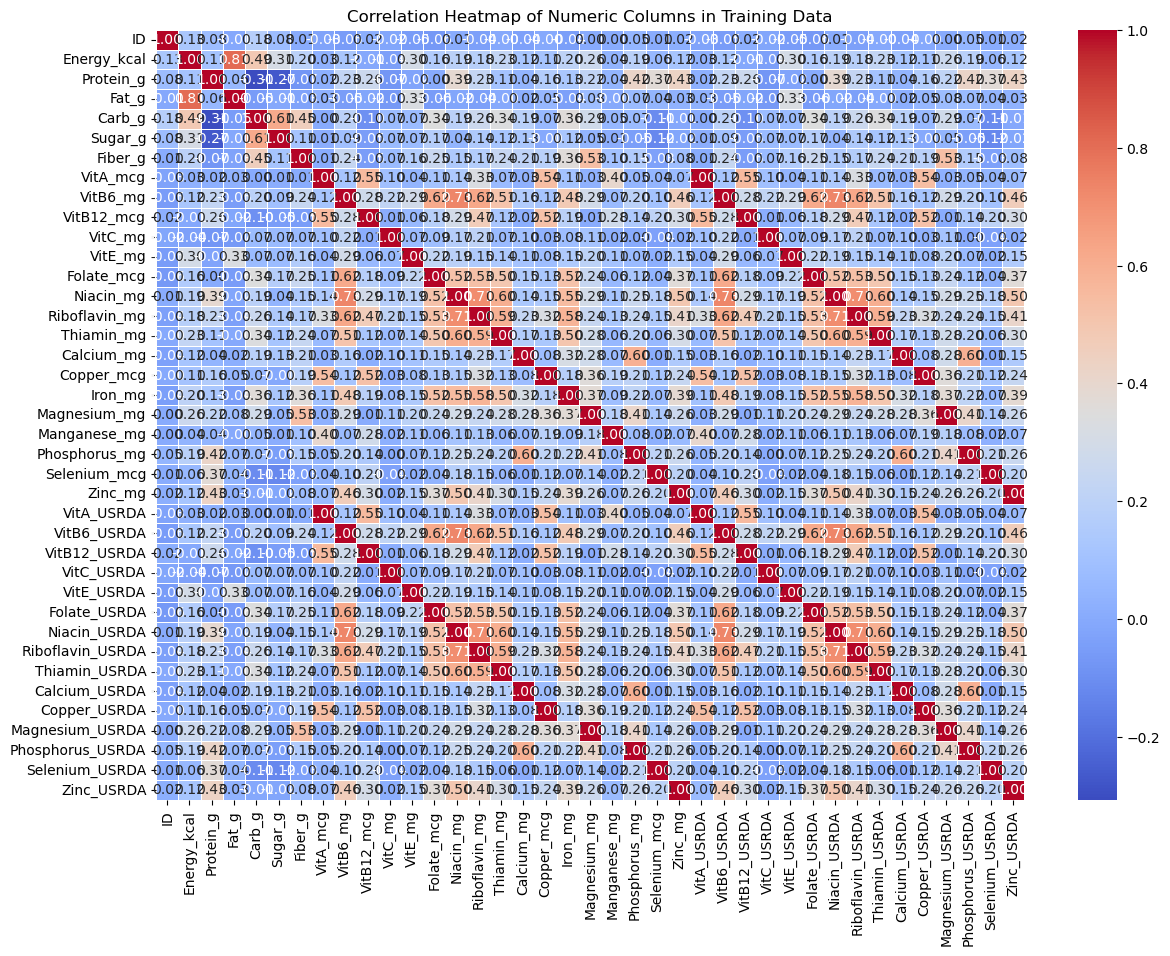

In [10]:
# Compute correlation only on numeric columns
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
correlation_matrix = train_df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns in Training Data")
plt.show()


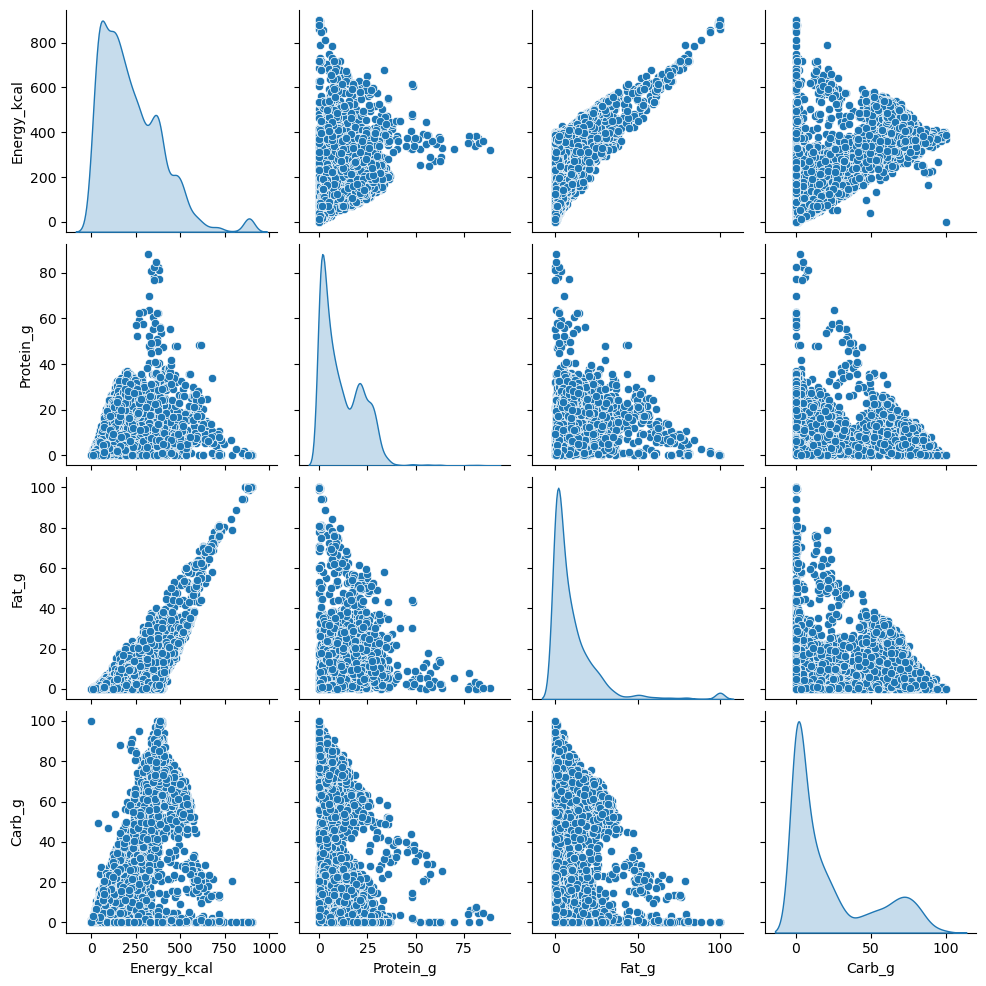

In [11]:
# Pairplot for macronutrients
sns.pairplot(train_df, vars=['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g'], diag_kind='kde')
plt.show()

In [12]:
# ------------------ Data Preprocessing ------------------
# Encode the 'FoodGroup' column (if categorical)
le = LabelEncoder()
train_df['FoodGroup'] = le.fit_transform(train_df['FoodGroup'])
test_df['FoodGroup'] = le.transform(test_df['FoodGroup'])

In [13]:
# Separate features and target variable
X_train = train_df.drop(columns=['ID', 'Descrip', 'Energy_kcal'], axis=1)
y_train = train_df['Energy_kcal']
X_test = test_df.drop(columns=['ID', 'Descrip', 'Energy_kcal'], axis=1)
y_test = test_df['Energy_kcal']

In [14]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# ------------------ Hybrid Model Creation ------------------
# Individual Models
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', max_iter=500, random_state=42)

In [16]:
# Hybrid Model: Voting Regressor
hybrid_model = VotingRegressor(estimators=[
    ('GradientBoosting', gb_model),
    ('MLP', mlp_model)
])

In [17]:
# ------------------ Model Training ------------------
print("\nTraining Hybrid Model...")
hybrid_model.fit(X_train_scaled, y_train)


Training Hybrid Model...


VotingRegressor(estimators=[('GradientBoosting',
                             GradientBoostingRegressor(max_depth=5,
                                                       n_estimators=200,
                                                       random_state=42)),
                            ('MLP',
                             MLPRegressor(hidden_layer_sizes=(100, 50),
                                          max_iter=500, random_state=42))])

In [18]:
# ------------------ Model Testing and Prediction ------------------
print("\nTesting Hybrid Model...")
y_pred = hybrid_model.predict(X_test_scaled)


Testing Hybrid Model...


In [19]:
# ------------------ Evaluation Metrics ------------------
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

In [20]:
# Calculate regression accuracy as a percentage
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape

In [21]:
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R2): {r2:.2f}")
print(f"Explained Variance Score (EVS): {evs:.2f}")



Model Evaluation Metrics:
Mean Absolute Error (MAE): 5.73
Mean Squared Error (MSE): 146.16
R-Squared (R2): 0.99
Explained Variance Score (EVS): 0.99
Accuracy: -inf%


In [23]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred) + epsilon)) * 100
accuracy = 100 - smape
print(f"Accuracy (SMAPE): {accuracy:.2f}%")


Accuracy (SMAPE): 94.82%


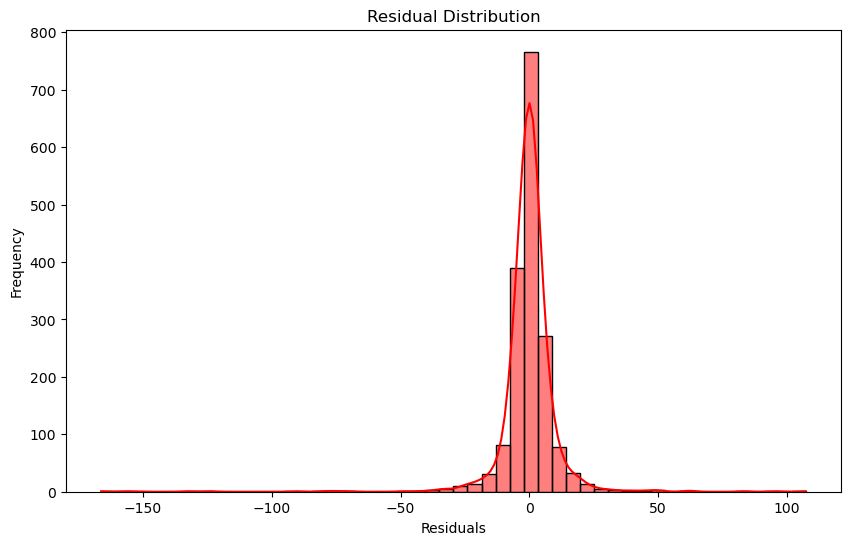

In [24]:
# ------------------ Resulting Curves and Visualizations ------------------
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color='red')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

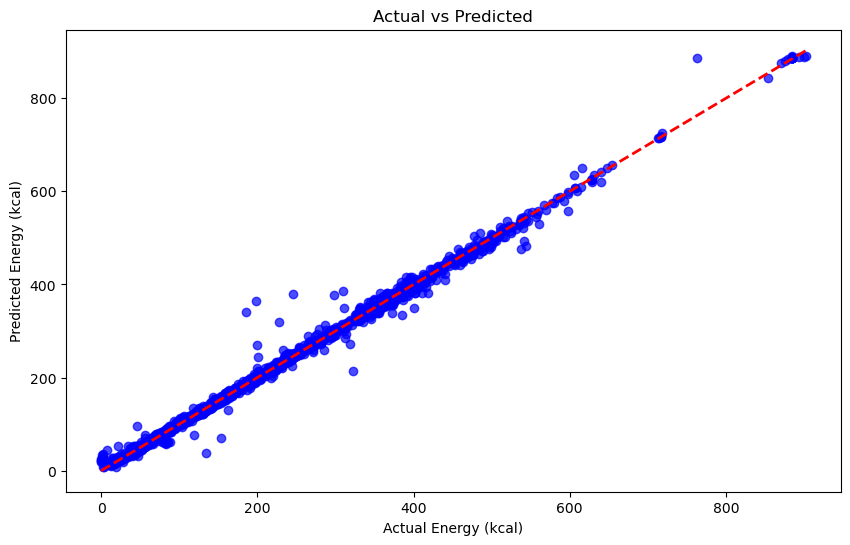

In [25]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.title("Actual vs Predicted")
plt.xlabel("Actual Energy (kcal)")
plt.ylabel("Predicted Energy (kcal)")
plt.show()

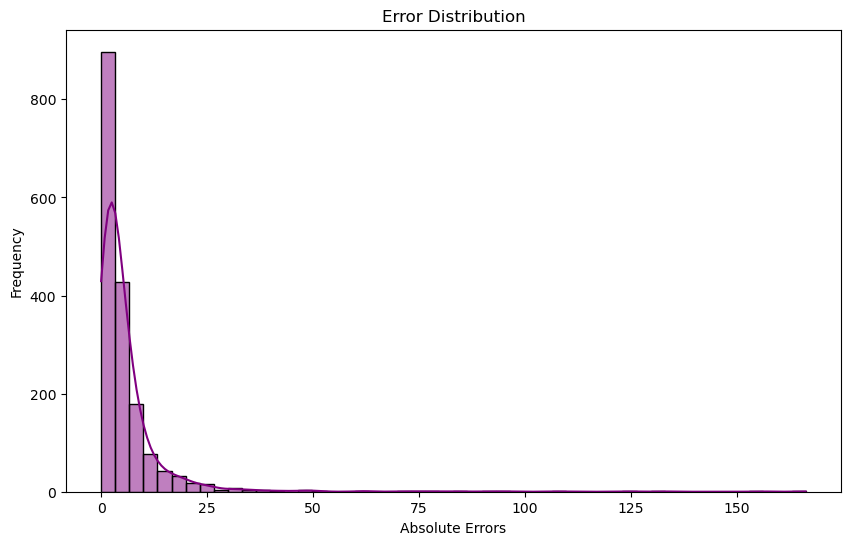

In [26]:
# Error Distribution
errors = np.abs(y_test - y_pred)
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=50, kde=True, color='purple')
plt.title("Error Distribution")
plt.xlabel("Absolute Errors")
plt.ylabel("Frequency")
plt.show()

In [27]:
# Feature Importance from Gradient Boosting
gb_model.fit(X_train_scaled, y_train)
feature_importance = gb_model.feature_importances_

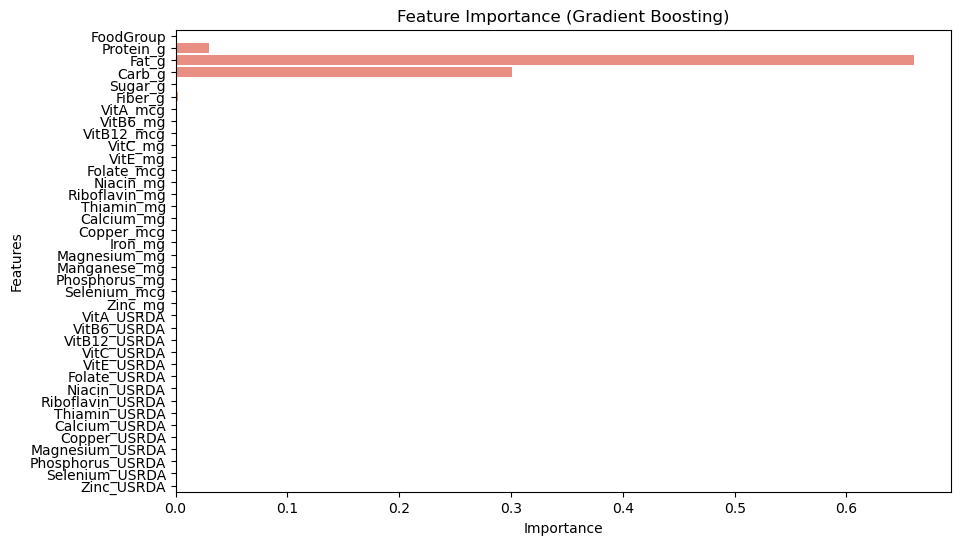

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X_train.columns, color='salmon')
plt.title("Feature Importance (Gradient Boosting)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [29]:
# ------------------ Save Results ------------------
# Save predictions for further analysis
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residual': residuals})
results.to_csv("diet_recommendation_predictions.csv", index=False)
print("\nPredictions saved to 'diet_recommendation_predictions.csv'.")



Predictions saved to 'diet_recommendation_predictions.csv'.


In [30]:
def recommend_food(carbohydrate, protein, fat, fiber=None, sugar=None):
    """
    Recommends food items based on user-specified nutrient requirements.
    
    Parameters:
    - carbohydrate (float): Desired carbohydrate value (g).
    - protein (float): Desired protein value (g).
    - fat (float): Desired fat value (g).
    - fiber (float, optional): Desired fiber value (g).
    - sugar (float, optional): Desired sugar value (g).

    Returns:
    - DataFrame: Top recommended foods sorted by how closely they match the input.
    """
    # Define default values for all features
    sample_input = {
        'Carb_g': carbohydrate,
        'Protein_g': protein,
        'Fat_g': fat,
        'Fiber_g': fiber if fiber is not None else 0,
        'Sugar_g': sugar if sugar is not None else 0,
    }

    # Add remaining features with default values
    for col in X_train.columns:
        if col not in sample_input:
            sample_input[col] = 0  # Default value for missing features

    # Convert to DataFrame and ensure correct order
    sample_input_df = pd.DataFrame([sample_input], columns=X_train.columns)

    # Scale the input
    sample_input_scaled = scaler.transform(sample_input_df)

    # Predict energy content for all foods in the dataset
    test_data = test_df.copy()
    test_features = test_data.drop(columns=['ID', 'Descrip', 'Energy_kcal'], axis=1)
    test_features_scaled = scaler.transform(test_features)
    test_data['Predicted_Energy_kcal'] = hybrid_model.predict(test_features_scaled)

    # Calculate a matching score based on user input
    test_data['Matching_Score'] = (
        np.abs(test_data['Carb_g'] - carbohydrate) +
        np.abs(test_data['Protein_g'] - protein) +
        np.abs(test_data['Fat_g'] - fat) +
        (np.abs(test_data['Fiber_g'] - fiber) if fiber is not None else 0) +
        (np.abs(test_data['Sugar_g'] - sugar) if sugar is not None else 0)
    )

    # Sort by Matching_Score to find the best matches
    recommendations = test_data.sort_values(by='Matching_Score').head(10)

    # Return the top 10 recommendations
    return recommendations[['Descrip', 'FoodGroup', 'Carb_g', 'Protein_g', 'Fat_g', 'Fiber_g', 'Sugar_g', 'Predicted_Energy_kcal']]

# Example usage
user_carbs = float(input("Enter desired carbohydrate value (g): "))
user_protein = float(input("Enter desired protein value (g): "))
user_fat = float(input("Enter desired fat value (g): "))

recommendations = recommend_food(carbohydrate=user_carbs, protein=user_protein, fat=user_fat)
print("\nTop Recommended Foods:\n")
print(recommendations)


Enter desired carbohydrate value (g):  20
Enter desired protein value (g):  20
Enter desired fat value (g):  5



Top Recommended Foods:

                                                Descrip  FoodGroup  Carb_g  \
1367  McDONALD'S, Premium Grilled Chicken Ranch BLT ...          8   21.91   
458   MORNINGSTAR FARMS Spicy Black Bean Burger, fro...         13   19.10   
1624  Fast foods, taco with chicken, lettuce and che...          8   19.69   
685   TACO BELL, Soft Taco with chicken, cheese and ...          8   19.69   
808                                Yeast extract spread         24   20.42   
1639              Tamales, masa and pork filling (Hopi)          0   18.28   
227   Fast foods, submarine sandwich, roast beef on ...          8   20.34   
1365  Fast foods, burrito, with beef, cheese, and ch...          8   20.96   
634            Veggie burgers or soyburgers, unprepared         13   14.27   
938            Fast foods, burrito, with beans and beef          8   19.52   

      Protein_g  Fat_g  Fiber_g  Sugar_g  Predicted_Energy_kcal  
1367      16.70   5.41      1.4     5.20          

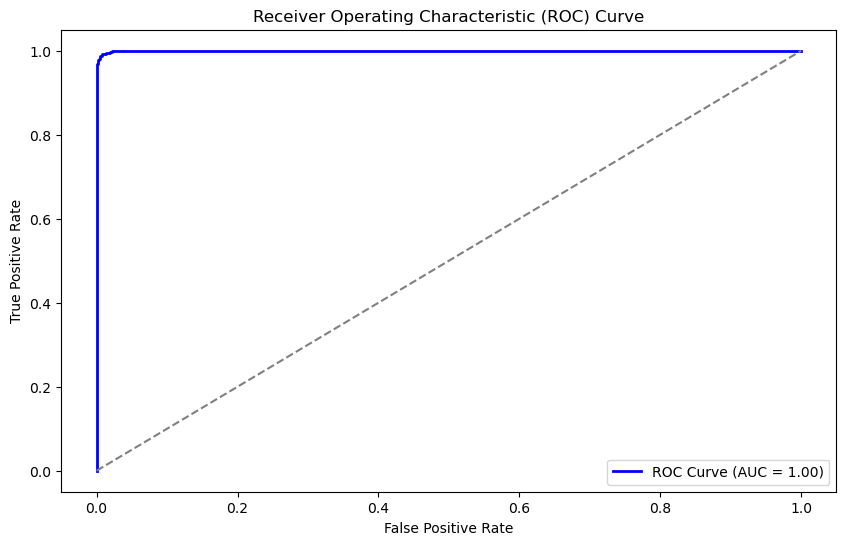

In [31]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# ------------------ Convert Regression to Classification ------------------
# Define threshold for high/low energy classification
threshold = np.median(y_test)  # Use median energy value as the threshold

# Create binary labels
y_test_binary = (y_test >= threshold).astype(int)
y_pred_binary = (y_pred >= threshold).astype(int)

# ------------------ ROC Curve ------------------
# Calculate ROC curve metrics
fpr, tpr, roc_thresholds = roc_curve(y_test_binary, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

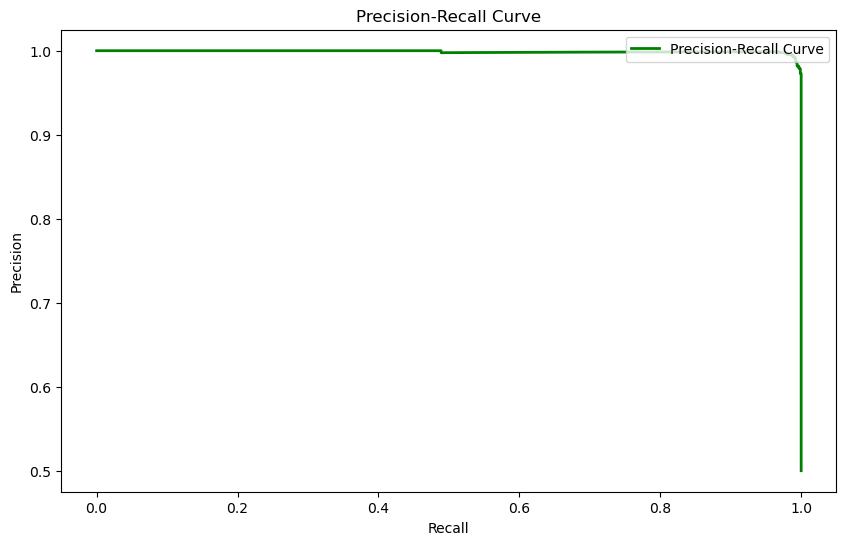

In [32]:
# ------------------ Precision-Recall Curve ------------------
precision, recall, pr_thresholds = precision_recall_curve(y_test_binary, y_pred)

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label="Precision-Recall Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right")
plt.show()